# Digdata and Facebook Step-Up Challenge

In [20]:
# Importing required class
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_excel('Data Set.xlsx')
df

,Study_id,Cell_id,Brand within 3s,Sound Off,Format,Platform,Question Type,Test Positive %,Control Positive %
0,1,Ads_only,1,1,Video,FB+IG,ad_recall,0.153576,0.087302
1,2,Influencer,1,1,Video,FB+IG,ad_recall,0.125000,0.029821
2,2,Ads_only,1,1,Video,FB+IG,ad_recall,0.170000,0.025440
3,3,Influencer,0,0,Mix,FB+IG,ad_recall,0.135397,0.101145
4,3,Ads_only,0,0,Mix,FB+IG,ad_recall,0.183908,0.100386
...,...,...,...,...,...,...,...,...,...
82,13,Ads_only,1,1,Image,FB+IG,purchase_intent,0.045311,0.041227
83,14,Influencer,1,1,Image,FB,purchase_intent,0.381679,0.384615
84,14,Ads_only,1,1,Image,FB,purchase_intent,0.210188,0.319588
85,15,Influencer,1,1,Image,FB+IG,purchase_intent,0.172621,0.199707


## Which advertising strategy is working better overall?

In [22]:
overall_performance = df.groupby('Platform')['Test Positive %'].mean().sort_values(ascending=False)

In [23]:
brand_awareness_performance = df[df['Question Type'] == 'brand_awareness'].groupby('Platform')['Test Positive %'].mean().sort_values(ascending=False)

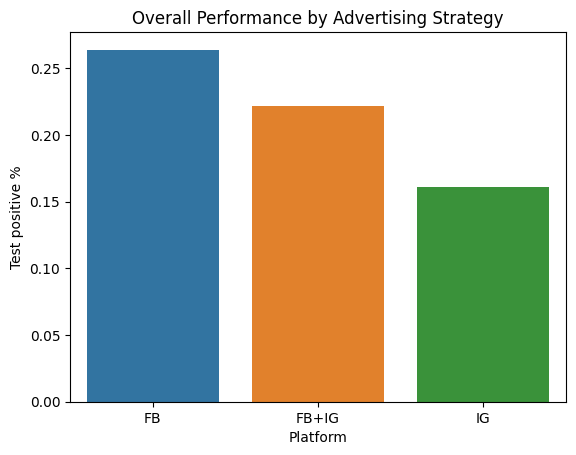

In [24]:
# Visualize overall performance
import seaborn as sns
sns.barplot(x=overall_performance.index, y=overall_performance.values)
plt.title('Overall Performance by Advertising Strategy')
plt.xlabel('Platform')
plt.ylabel('Test positive %')
plt.show()

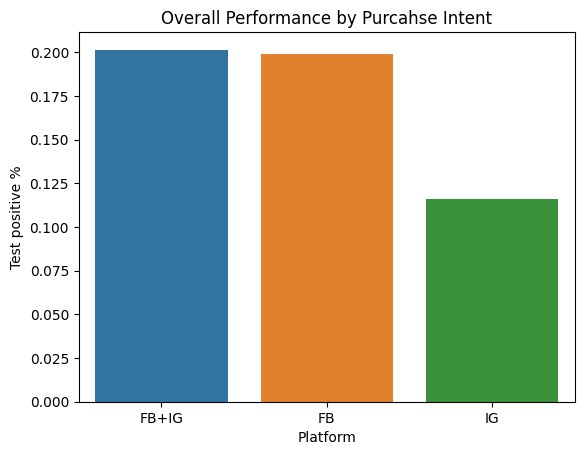

In [25]:
purchase_intent = df[df['Question Type'] == 'purchase_intent'].groupby('Platform')['Test Positive %'].mean().sort_values(ascending=False)
import seaborn as sns
sns.barplot(x=purchase_intent.index, y=purchase_intent.values)
plt.title('Overall Performance by Purcahse Intent')
plt.xlabel('Platform')
plt.ylabel('Test positive %')
plt.show()

The Bar Chart show that:
   
   1. Faceboomk Marketing Strategy is working better compared to the Facebook+Instagram and Instagram.
   2. Facebook and Facebook+Instagram is better platform if looked to teh Purcahse Intent of the User.

## Which is working better for brand awareness?

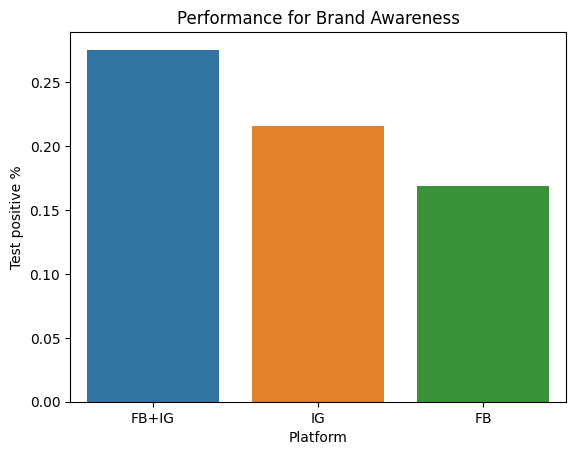

In [26]:
# Visualize performance for brand awareness
sns.barplot(x=brand_awareness_performance.index, y=brand_awareness_performance.values)
plt.title('Performance for Brand Awareness')
plt.xlabel('Platform')
plt.ylabel('Test positive %')
plt.show()

The Barchart Show that:

  1. Facebook+Instagram Platform works best for the Brand Awareness Question.

## What can be done to improve their advertising on Facebook in the future?

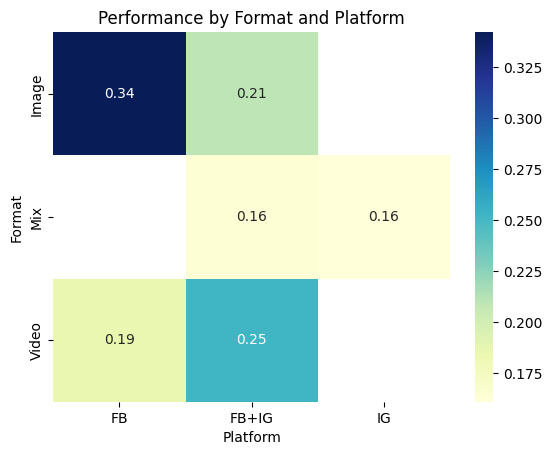

In [36]:
format_platform_performance = df.groupby(['Format', 'Platform'])['Test Positive %'].mean().unstack()
sns.heatmap(format_platform_performance,annot=True, cmap='YlGnBu')
plt.title('Performance by Format and Platform')
plt.xlabel('Platform')
plt.ylabel('Format')
plt.show()

The Heatmap show that:

 1. To improve Advertising on facebook the user need to post Image Format more comapred to other formats. 

##  Is there anything else you would like to analyse to improve your conclusions?

In [28]:
pivot_table = df.pivot_table(index='Question Type', columns='Cell_id', values=['Test Positive %', 'Control Positive %'])
pivot_table *= 100
pivot_table = pivot_table.round(2)
print(pivot_table)

                Control Positive %            Test Positive %           
Cell_id                   Ads_only Influencer        Ads_only Influencer
Question Type                                                           
ad_recall                    15.28      15.87           21.17      22.64
brand_awareness              21.82      24.67           26.59      24.67
purchase_intent              21.11      20.88           19.09      20.01


<Axes: xlabel='None-Cell_id', ylabel='Question Type'>

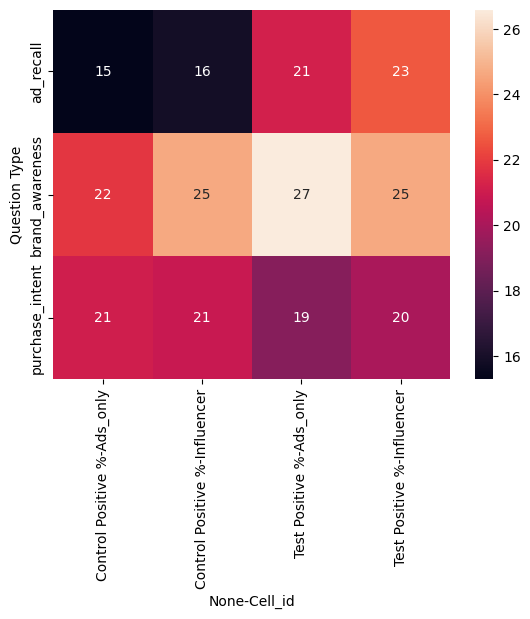

In [29]:
sns.heatmap(pivot_table,annot=True)

From the Heatmap and Pivot Table we can say that
1. For Purcahse Intent The Influncer marketing was good stratergy for both the Test Group and Controlled group.

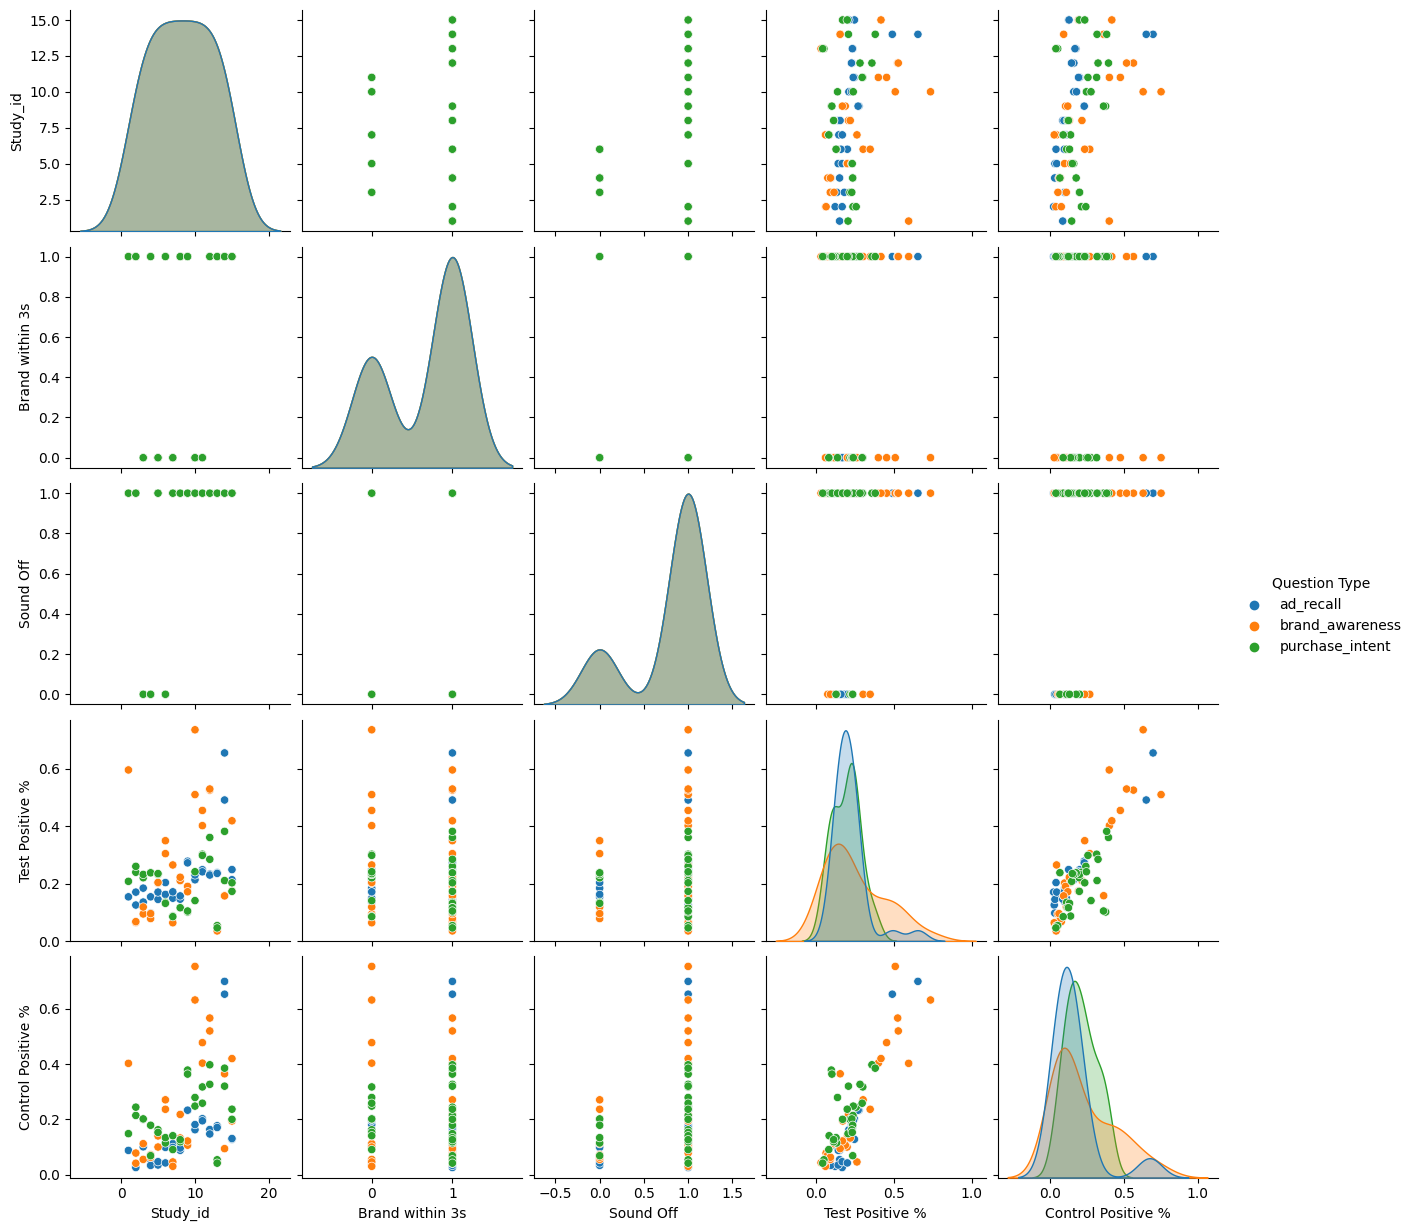

In [30]:
sns.pairplot(df,hue='Question Type')

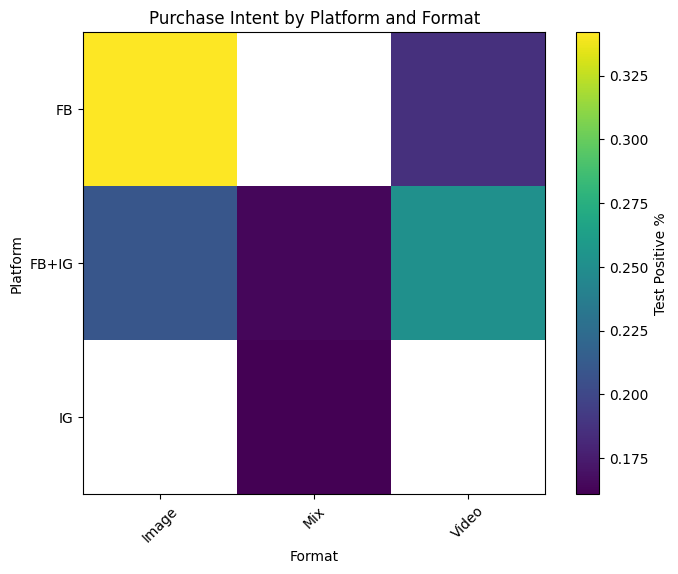

In [31]:
purchase_intent_pivot = df.pivot_table(index='Platform', columns='Format', values='Test Positive %', aggfunc='mean')
plt.figure(figsize=(8, 6))
plt.imshow(purchase_intent_pivot, cmap='viridis')
plt.colorbar(label='Test Positive %')
plt.xticks(range(len(purchase_intent_pivot.columns)), purchase_intent_pivot.columns, rotation=45)
plt.yticks(range(len(purchase_intent_pivot.index)), purchase_intent_pivot.index)
plt.xlabel('Format')
plt.ylabel('Platform')
plt.title('Purchase Intent by Platform and Format')
plt.show()

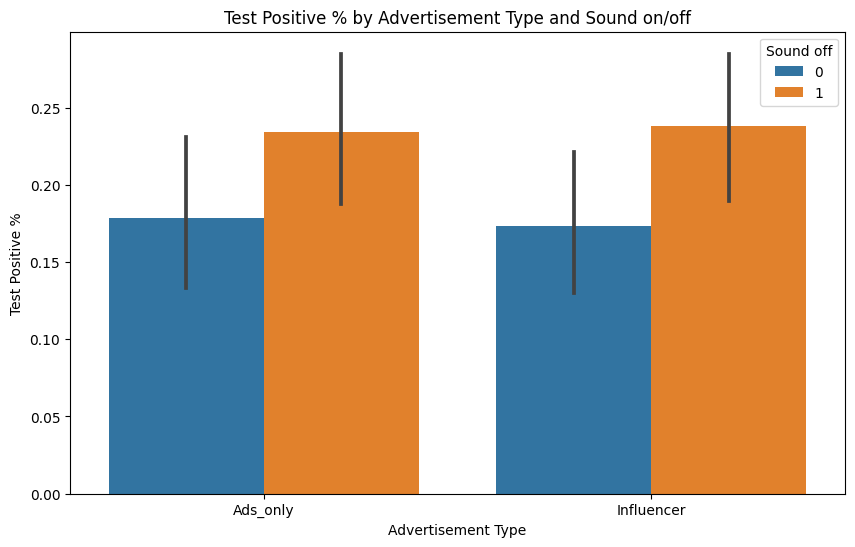

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cell_id', y='Test Positive %', hue='Sound Off', data=df)
plt.xlabel('Advertisement Type')
plt.ylabel('Test Positive %')
plt.title('Test Positive % by Advertisement Type and Sound on/off')
plt.legend(title='Sound off')
plt.show()

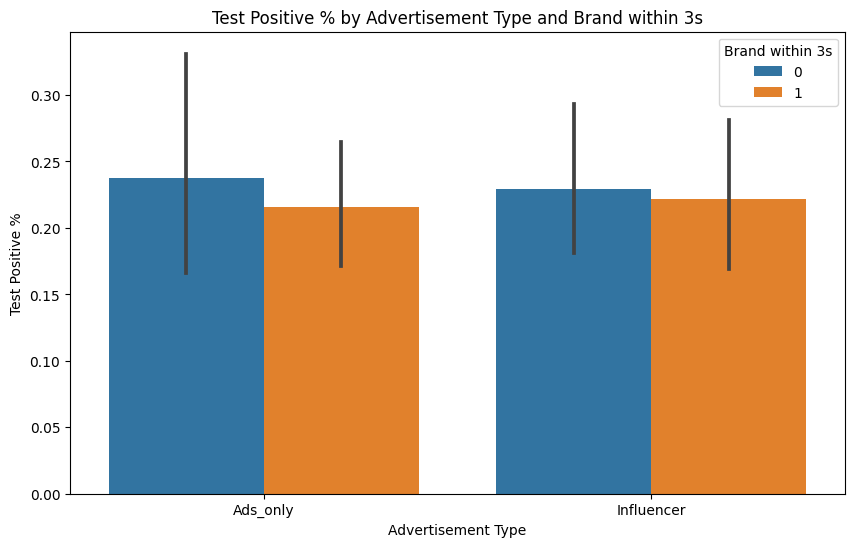

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cell_id', y='Test Positive %', hue='Brand within 3s', data=df)
plt.xlabel('Advertisement Type')
plt.ylabel('Test Positive %')
plt.title('Test Positive % by Advertisement Type and Brand within 3s')
plt.legend(title='Brand within 3s')
plt.show()

### Conclusion

1.From the above Braplot it can be said that if the Brand doesn' tappers within 03 second suound off is opted there is high chances of Desired reponse.
